In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model  import LogisticRegression, LinearRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score , mean_squared_error, r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/ADP_33/p1.csv')
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=B,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=B,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=B,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=B,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=B,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


1-1 결측치 처리 방안 2개 제시하고, 처리 전후 비교 및 더 나은 방안 선택하여 전처리 완료

In [9]:
df.isna().sum().to_frame().T

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,0,0,1,18,1,0,0,0,10,0,0,1


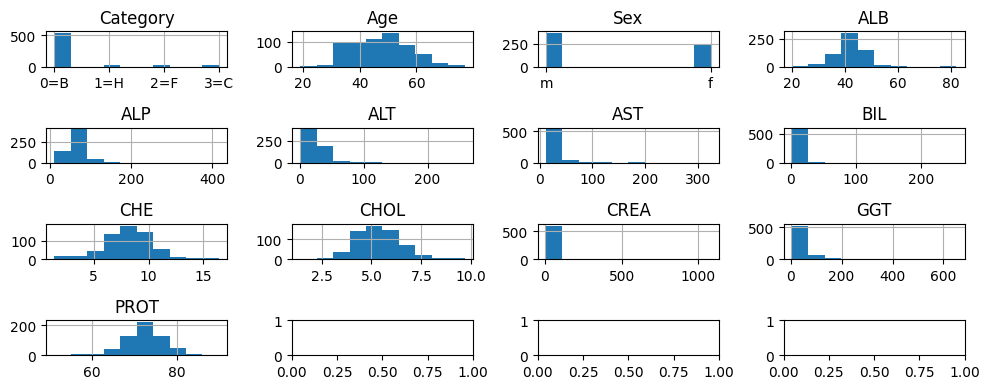


ALP - 0~200으로 쏠려 있음 
CHOL- 정규분포 
ALB - 




In [16]:
fig, axes = plt.subplots(4,4, figsize = (10, 4)) 

for axes, col in zip(axes.flatten(), df.columns ) : 
    df[col].hist(ax = axes)
    axes.set_title(col)

plt.tight_layout()
plt.show()

print('''
결측치가 있는 컬럼들의 분포도를 고려하여, 평균 대치법 (Category별)
''')

In [31]:
# 1. Category별 평균 대치 
c_df = df.copy()
for col in c_df.columns : 
    if c_df[col].isna().sum() > 0 : 
        c_df[col] =  c_df[col].fillna(c_df.groupby('Category')[col].transform('mean')) 

c_df.describe().T.loc[['ALB' ,'ALP', 'ALT'] , ['mean','std']]

,mean,std
ALB,41.803426,5.415513
ALP,67.501057,25.351926
ALT,27.600164,21.210065
